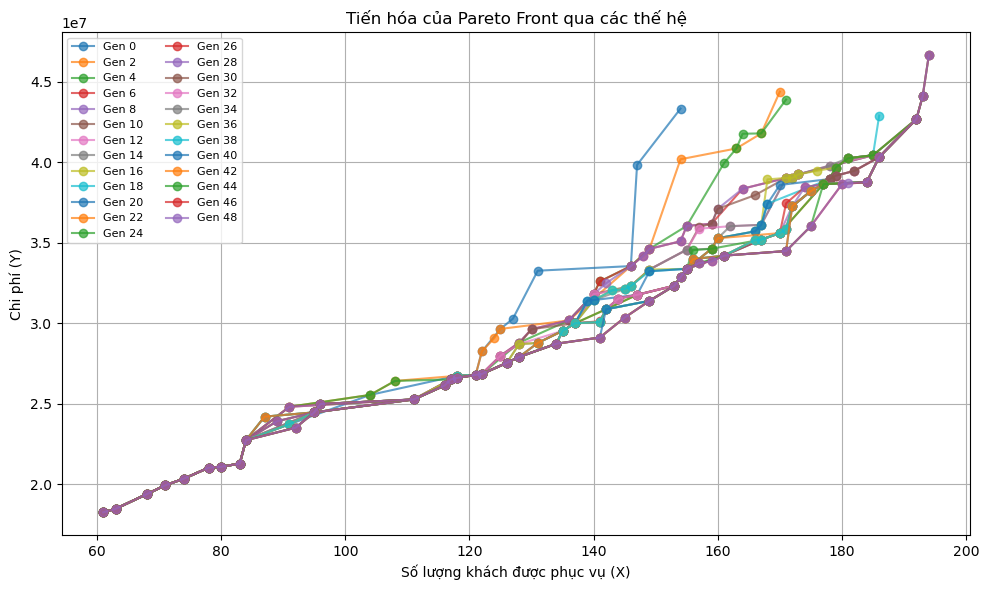

In [10]:
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
def read_pareto_file(filename):
    generations = []
    current_gen = []

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])
                    y = float(parts[1])
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations

# Vẽ Pareto front với đường nối từng thế hệ
def plot_generations_with_lines(generations):
    plt.figure(figsize=(10, 6))
    cmap = plt.get_cmap("tab20")  # Màu cho từng thế hệ

    for i, gen in enumerate(generations):
        if(i%2==0):
          gen_sorted = sorted(gen, key=lambda x: x[0])  # Sắp xếp theo X để nối đúng thứ tự
          x_vals = [pt[0] for pt in gen_sorted]
          y_vals = [pt[1] for pt in gen_sorted]
          plt.plot(x_vals, y_vals, marker='o', label=f"Gen {i}", color=cmap(i % 20), alpha=0.7)

    plt.xlabel("Số lượng khách được phục vụ (X)")
    plt.ylabel("Chi phí (Y)")
    plt.title("Tiến hóa của Pareto Front qua các thế hệ")
    plt.legend(fontsize=8, ncol=2, loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chạy
filename = r"D:\Project GA new\pareto_result\pareto_front_200_45_1_NSGA_true.txt"  # Đổi tên file nếu khác
generations = read_pareto_file(filename)
plot_generations_with_lines(generations)


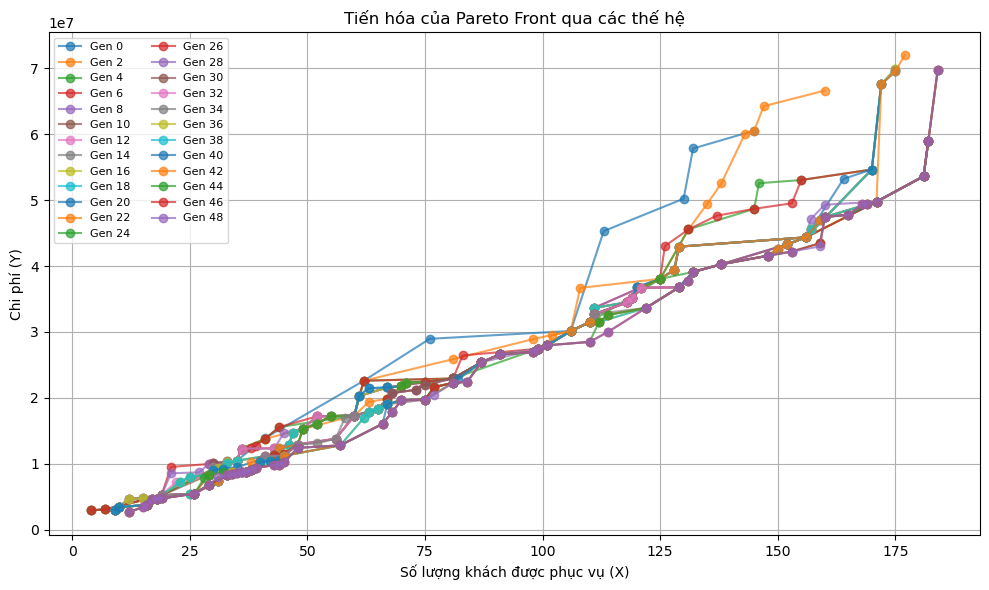

In [34]:
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
def read_pareto_file(filename):
    generations = []
    current_gen = []

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])
                    y = float(parts[1])
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations

# Vẽ Pareto front với đường nối từng thế hệ
def plot_generations_with_lines(generations):
    plt.figure(figsize=(10, 6))
    cmap = plt.get_cmap("tab20")  # Màu cho từng thế hệ

    for i, gen in enumerate(generations):
        if(i%2==0):
          gen_sorted = sorted(gen, key=lambda x: x[0])  # Sắp xếp theo X để nối đúng thứ tự
          x_vals = [pt[0] for pt in gen_sorted]
          y_vals = [pt[1] for pt in gen_sorted]
          plt.plot(x_vals, y_vals, marker='o', label=f"Gen {i}", color=cmap(i % 20), alpha=0.7)

    plt.xlabel("Số lượng khách được phục vụ (X)")
    plt.ylabel("Chi phí (Y)")
    plt.title("Tiến hóa của Pareto Front qua các thế hệ")
    plt.legend(fontsize=8, ncol=2, loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chạy
filename = r"D:\Project GA new\data\Pareto1_Moea_200.txt"  # Đổi tên file nếu khác
generations = read_pareto_file(filename)
plot_generations_with_lines(generations)

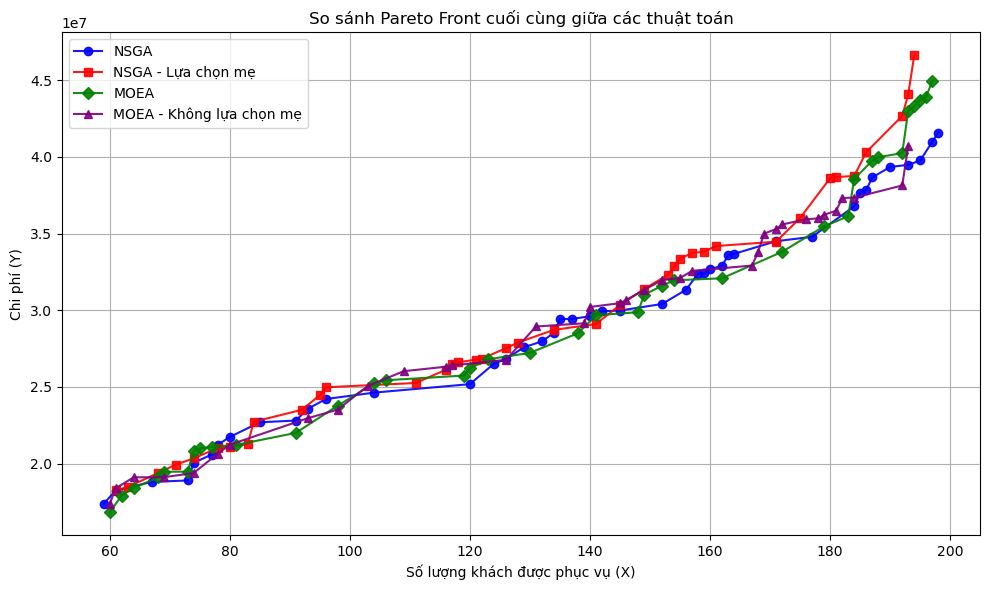

In [12]:
import matplotlib.pyplot as plt

# Đọc Pareto cuối cùng từ file
def read_last_pareto(filename):
    generations = []
    current_gen = []

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])
                    y = float(parts[1])
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations[-1]  # chỉ lấy thế hệ cuối cùng

# Hàm vẽ 4 Pareto cuối
def plot_last_paretos(data_list, labels, colors, markers):
    plt.figure(figsize=(10, 6))

    for data, label, color, marker in zip(data_list, labels, colors, markers):
        data_sorted = sorted(data, key=lambda x: x[0])
        x_vals = [p[0] for p in data_sorted]
        y_vals = [p[1] for p in data_sorted]
        plt.plot(x_vals, y_vals, marker=marker, linestyle='-', label=label, color=color, markersize=6, linewidth=1.5, alpha=0.9)

    plt.xlabel("Số lượng khách được phục vụ (X)")
    plt.ylabel("Chi phí (Y)")
    plt.title("So sánh Pareto Front cuối cùng giữa các thuật toán")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Đường dẫn đến 4 file
file1 = r"D:\Project GA new\pareto_result\pareto_front_200_45_1_NSGA_false.txt"
file2 = r"D:\Project GA new\pareto_result\pareto_front_200_45_1_NSGA_true.txt"
file3 = r"D:\Project GA new\pareto_result\pareto_front_200_45_1_MOEA_true.txt"
file4 = r"D:\Project GA new\pareto_result\pareto_front_200_45_1_MOEA_false.txt"

# Đọc dữ liệu
pareto1 = read_last_pareto(file1)
pareto2 = read_last_pareto(file2)
pareto3 = read_last_pareto(file3)
pareto4 = read_last_pareto(file4)

# Gọi hàm vẽ
data_list = [pareto1, pareto2, pareto3, pareto4]
labels = ['NSGA', 'NSGA - Lựa chọn mẹ', 'MOEA', 'MOEA - Không lựa chọn mẹ']
colors = ['blue', 'red', 'green', 'purple']   # 4 màu khác nhau rõ ràng
markers = ['o', 's', 'D', '^']                 # 4 marker khác: tròn, vuông, kim cương, tam giác

plot_last_paretos(data_list, labels, colors, markers)


Best: [ 2.60000e+01 -2.76115e+07]
Ref : [ 2.17400e+02 -6.28313e+05]


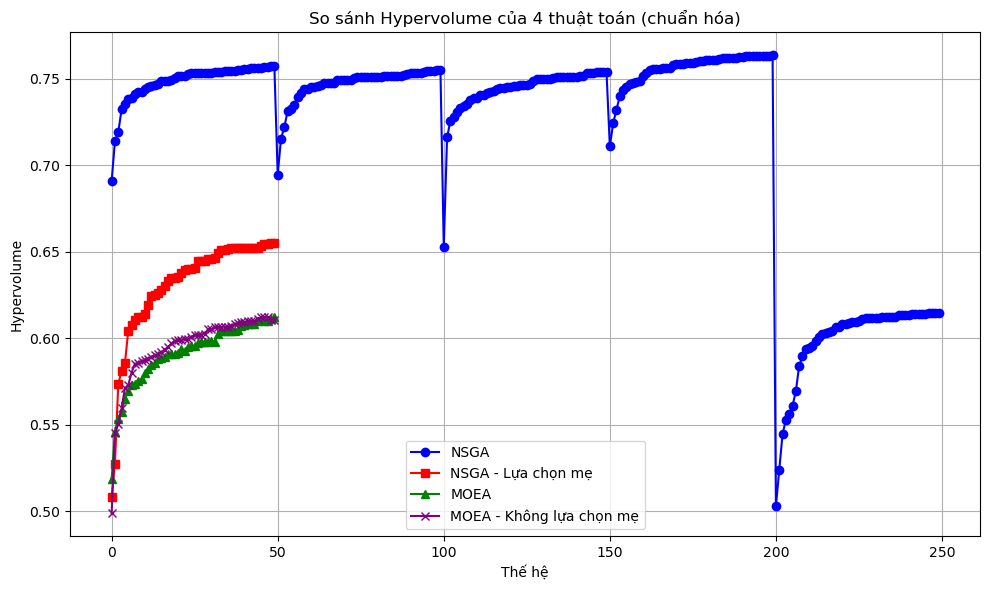

In [3]:
import matplotlib.pyplot as plt
from pymoo.indicators.hv import HV
import numpy as np

# Đọc dữ liệu từ file
def read_pareto_file(filename):
    generations = []
    current_gen = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])  # chi phí
                    y = float(parts[1])  # số lượng khách
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations

# Chuyển mục tiêu maximize thành minimize
def convert_max_to_min(generations):
    converted = []
    for gen in generations:
        gen_conv = [(c, -k) for c, k in gen]
        converted.append(gen_conv)
    return converted

# Tìm điểm tốt nhất và điểm tham chiếu
def get_bounds(list_of_generations, alpha=0.1):
    all_points = []
    for gens in list_of_generations:
        for gen in gens:
            all_points.extend(gen)
    all_points = np.array(all_points)
    worst = np.max(all_points, axis=0)
    best = np.min(all_points, axis=0)
    ref = worst + alpha * (worst - best)
    return best, ref

# Chuẩn hóa
def normalize_generations(generations, best, ref):
    norm_gens = []
    for gen in generations:
        gen_np = np.array(gen)
        norm = (ref - gen_np) / (ref - best)
        norm = np.clip(norm, 0, 1)
        norm_gens.append(norm.tolist())
    return norm_gens

# Tính hypervolume
def compute_hypervolumes(generations):
    hv = HV(ref_point=np.array([1.0, 1.0]))
    hv_vals = []
    for gen in generations:
        front = np.array(gen)
        hv_vals.append(hv.do(front))
    return hv_vals

# Vẽ hypervolume
def plot_hv_comparison(hv_list, labels, colors, markers):
    plt.figure(figsize=(10, 6))
    for hv_vals, label, color, marker in zip(hv_list, labels, colors, markers):
        plt.plot(hv_vals, label=label, marker=marker, color=color)
    plt.xlabel("Thế hệ")
    plt.ylabel("Hypervolume")
    plt.title("So sánh Hypervolume của 4 thuật toán (chuẩn hóa)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ==================== MAIN ====================

# 4 file cần đọc
file_ga1   = r"D:\Project GA new\pareto_result\pareto_front_200_20_1_NSGA_false.txt"
file_moea1 = r"D:\Project GA new\pareto_result\pareto_front_200_20_1_MOEA_true.txt"
file_ga2   = r"D:\Project GA new\pareto_result\pareto_front_200_20_1_NSGA_true.txt"
file_moea2 = r"D:\Project GA new\pareto_result\pareto_front_200_20_1_MOEA_false.txt"

# Đọc dữ liệu
gen_ga1 = read_pareto_file(file_ga1)
gen_moea1 = read_pareto_file(file_moea1)
gen_ga2 = read_pareto_file(file_ga2)
gen_moea2 = read_pareto_file(file_moea2)

# Chuyển maximize -> minimize
gen_ga1 = convert_max_to_min(gen_ga1)
gen_moea1 = convert_max_to_min(gen_moea1)
gen_ga2 = convert_max_to_min(gen_ga2)
gen_moea2 = convert_max_to_min(gen_moea2)

# Tìm best, ref point dựa trên tất cả
best_point, ref_point = get_bounds([gen_ga1, gen_moea1, gen_ga2, gen_moea2], alpha=0.1)
print("Best:", best_point)
print("Ref :", ref_point)

# Chuẩn hóa
norm_ga1 = normalize_generations(gen_ga1, best_point, ref_point)
norm_moea1 = normalize_generations(gen_moea1, best_point, ref_point)
norm_ga2 = normalize_generations(gen_ga2, best_point, ref_point)
norm_moea2 = normalize_generations(gen_moea2, best_point, ref_point)

# Tính hypervolume
hv_ga1 = compute_hypervolumes(norm_ga1)
hv_moea1 = compute_hypervolumes(norm_moea1)
hv_ga2 = compute_hypervolumes(norm_ga2)
hv_moea2 = compute_hypervolumes(norm_moea2)

# Vẽ biểu đồ
# Vẽ biểu đồ
hv_list = [hv_ga1, hv_ga2, hv_moea1, hv_moea2]
labels  = ["NSGA", "NSGA - Lựa chọn mẹ", "MOEA", "MOEA - Không lựa chọn mẹ"]
colors  = ["blue", "red", "green", "purple"]
markers = ["o", "s", "^", "x"]

plot_hv_comparison(hv_list, labels, colors, markers)



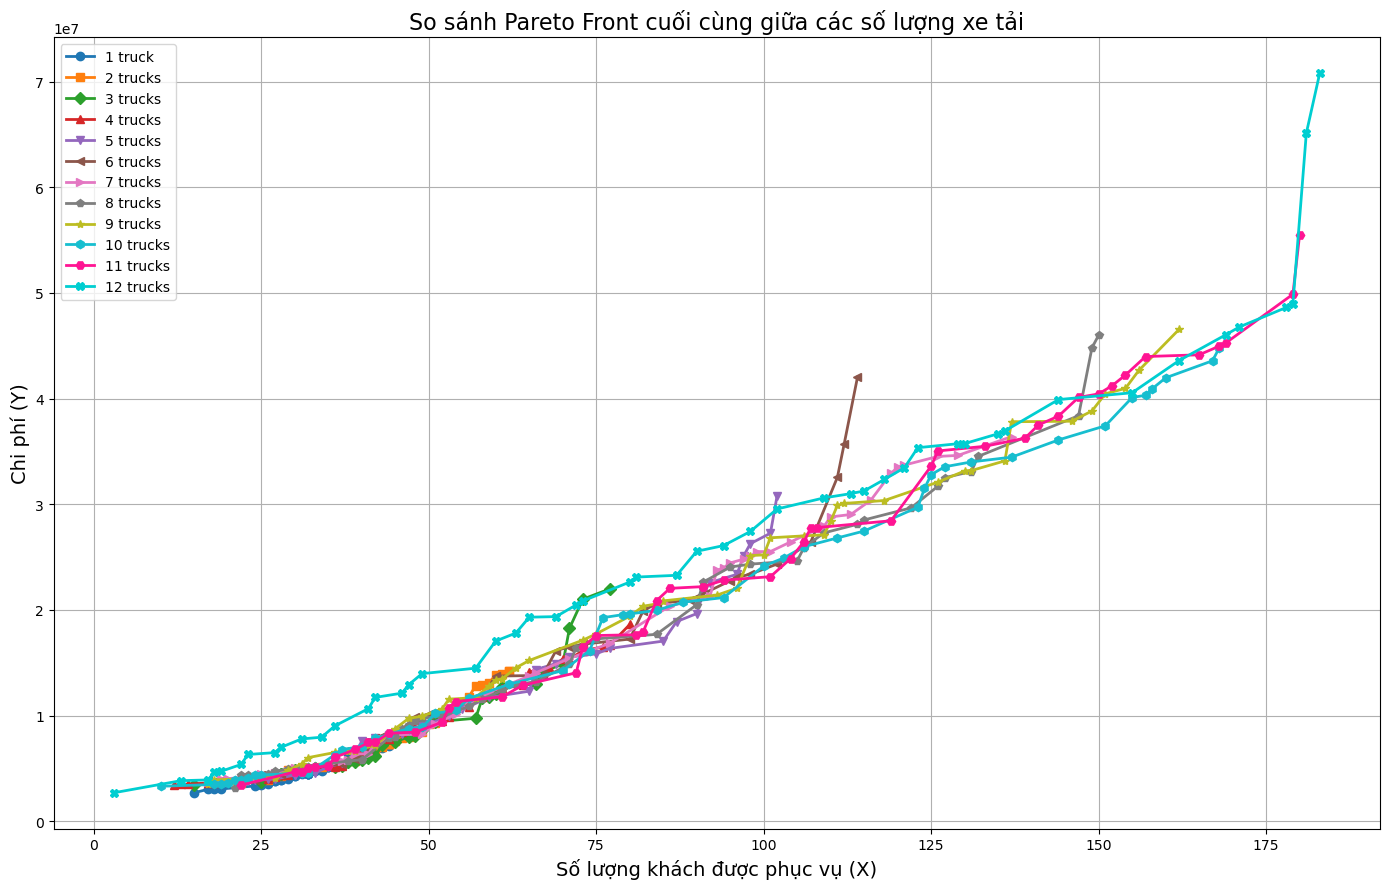

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Đọc Pareto cuối cùng từ file
def read_last_pareto(filename):
    generations = []
    current_gen = []

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])
                    y = float(parts[1])
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations[-1]  # chỉ lấy thế hệ cuối cùng

# Hàm vẽ
def plot_last_paretos(data_list, labels, colors, markers):
    plt.figure(figsize=(14, 9))

    for data, label, color, marker in zip(data_list, labels, colors, markers):
        data_sorted = sorted(data, key=lambda x: x[0])
        x_vals = [p[0] for p in data_sorted]
        y_vals = [p[1] for p in data_sorted]
        plt.plot(x_vals, y_vals, marker=marker, linestyle='-', label=label,
                 color=color, markersize=6, linewidth=2, alpha=1.0)  # đậm hơn: linewidth=2, alpha=1

    plt.xlabel("Số lượng khách được phục vụ (X)", fontsize=14)
    plt.ylabel("Chi phí (Y)", fontsize=14)
    plt.title("So sánh Pareto Front cuối cùng giữa các số lượng xe tải", fontsize=16)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Đọc dữ liệu
data_list = []
labels = []
for i in range(1, 13):
    filename = f"D:/Project GA new/data/Pareto1_Moea_with_select_parent2_{i}.txt"
    pareto = read_last_pareto(filename)
    data_list.append(pareto)
    labels.append(f"{i} truck{'s' if i > 1 else ''}")

# Màu đậm rõ ràng
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#ff1493', '#00ced1'
]

# 12 markers đẹp
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X']

# Vẽ
plot_last_paretos(data_list, labels, colors, markers)


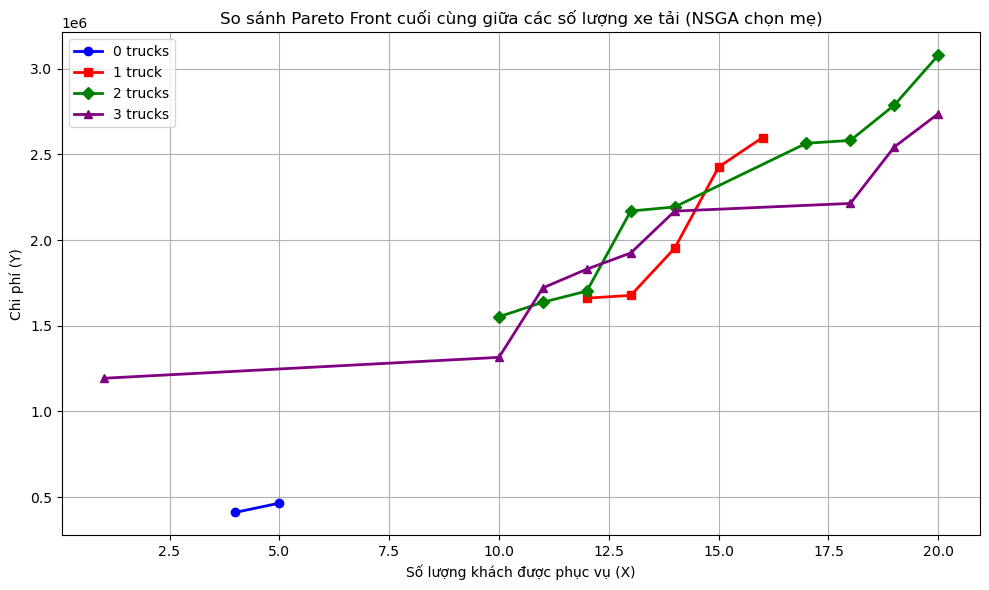

In [41]:
import matplotlib.pyplot as plt

# Hàm đọc Pareto cuối cùng
def read_last_pareto(filename):
    generations = []
    current_gen = []

    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thế hệ thứ"):
                if current_gen:
                    generations.append(current_gen)
                    current_gen = []
            elif line:
                parts = line.split()
                if len(parts) == 2:
                    x = int(parts[0])
                    y = float(parts[1])
                    current_gen.append((x, y))
        if current_gen:
            generations.append(current_gen)
    return generations[-1]

# Vẽ nhiều Pareto
def plot_last_paretos(data_list, labels, colors, markers):
    plt.figure(figsize=(10, 6))

    for data, label, color, marker in zip(data_list, labels, colors, markers):
        data_sorted = sorted(data, key=lambda x: x[0])
        x_vals = [p[0] for p in data_sorted]
        y_vals = [p[1] for p in data_sorted]
        plt.plot(x_vals, y_vals, marker=marker, linestyle='-', label=label,
                 color=color, markersize=6, linewidth=2, alpha=1.0)

    plt.xlabel("Số lượng khách được phục vụ (X)")
    plt.ylabel("Chi phí (Y)")
    plt.title("So sánh Pareto Front cuối cùng giữa các số lượng xe tải (NSGA chọn mẹ)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Các file cần đọc
base_path = r"D:\Project GA new\data"  # đổi đường dẫn phù hợp
file_names = [
    f"{base_path}\\Pareto1_Nsga_with_select_parent2_{i}.txt" for i in range(4)
]

# Đọc dữ liệu
paretos = [read_last_pareto(file) for file in file_names]

# Các nhãn, màu, marker
labels = [f"{i} truck{'s' if i != 1 else ''}" for i in range(4)]
colors = ['blue', 'red', 'green', 'purple']
markers = ['o', 's', 'D', '^']

# Vẽ
plot_last_paretos(paretos, labels, colors, markers)


In [19]:
import os

# Cấu hình các tham số
customer_sets = {
    20: [5, 10, 20],
    50: [10, 20, 30, 40],
    100: [10, 20, 30, 40],
    200:[10, 20, 30, 40]
}

data_ids = range(1, 5)  # từ 1 đến 4
algorithms = ["MOEA", "NSGA"]
parent_choices = ["true", "false"]

# Thư mục chứa các file kết quả (có thể thay đổi nếu cần)
results_dir = r"D:\Project GA new\pareto_result"

# Danh sách file thực tế
actual_files = set(os.listdir(results_dir))

# Tạo danh sách tên file mong đợi và kiểm tra file còn thiếu
missing_files = []

for n_customers, grid_sizes in customer_sets.items():
    for grid_size in grid_sizes:
        for data_id in data_ids:
            for algo in algorithms:
                for parent_choice in parent_choices:
                    filename = f"pareto_front_{n_customers}_{grid_size}_{data_id}_{algo}_{parent_choice}.txt"
                    if filename not in actual_files:
                        missing_files.append(filename)

# In kết quả
print(f"Tổng số file thiếu: {len(missing_files)}")
for file in missing_files:
    print(file)


Tổng số file thiếu: 0


pareto_front_1.txt: Hypervolume = 0.7313
pareto_front_2.txt: Hypervolume = 0.7392
pareto_front_3.txt: Hypervolume = 0.7593
pareto_front_4.txt: Hypervolume = 0.7527
pareto_front_5.txt: Hypervolume = 0.7570
pareto_front_6.txt: Hypervolume = 0.7663
pareto_front_7.txt: Hypervolume = 0.7601
pareto_front_8.txt: Hypervolume = 0.7593
pareto_front_9.txt: Hypervolume = 0.7664
pareto_front_10.txt: Hypervolume = 0.7499
pareto_front_11.txt: Hypervolume = 0.7291
pareto_front_12.txt: Hypervolume = 0.6518


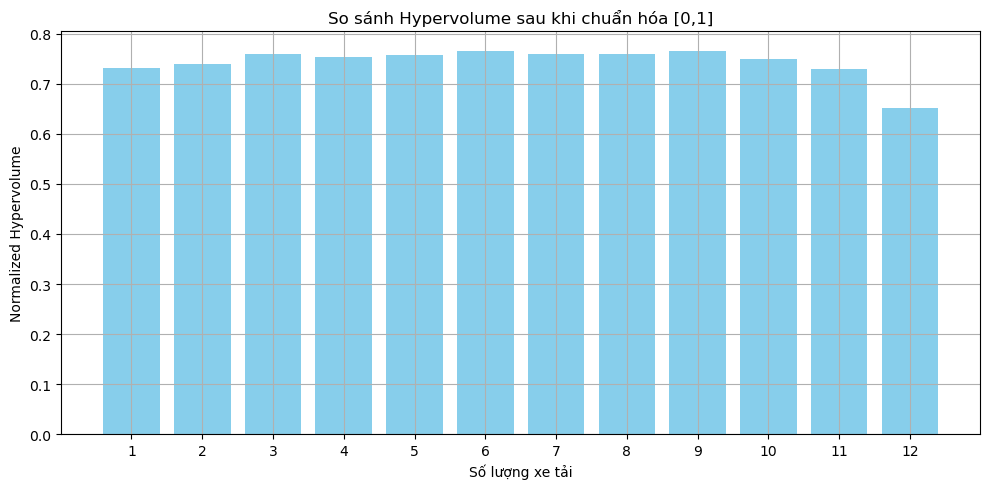

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pymoo.indicators.hv import HV

# Đường dẫn chứa các file .txt
folder = r"D:\Project GA new\multi_truck_problem"  # <-- sửa đường dẫn tại đây

pareto_fronts = []

# Đọc dữ liệu từ 12 file
for i in range(1, 13):
    file_path = os.path.join(folder, f"pareto_front_{i}.txt")
    with open(file_path, "r") as f:
        lines = f.readlines()

    # Tìm các chỉ số dòng chứa "Thế hệ thứ:"
    gen_indices = [idx for idx, line in enumerate(lines) if line.startswith("Thế hệ thứ:")]
    last_gen_start = gen_indices[-1] + 1

    # Lấy dữ liệu của thế hệ cuối
    front = []
    for line in lines[last_gen_start:]:
        if line.strip() == "" or line.startswith("Thế hệ"):
            break
        parts = line.strip().split()
        if len(parts) == 2:
            max_customer = int(parts[0])
            min_cost = float(parts[1])
            # Đảo dấu max_customer để chuyển sang minimization
            front.append([-max_customer, min_cost])

    pareto_fronts.append(np.array(front))


# ----- Chuẩn hóa về [0,1] -----
all_points = np.vstack(pareto_fronts)
mins = np.min(all_points, axis=0)
maxs = np.max(all_points, axis=0)

def normalize(front, mins, maxs):
    return (front - mins) / (maxs - mins + 1e-8)  # tránh chia 0

normalized_fronts = [normalize(front, mins, maxs) for front in pareto_fronts]

# ----- Tính Hypervolume -----
ref_point = np.array([1, 1])  # ref_point nên nằm ngoài [0,1]
hv_indicator = HV(ref_point=ref_point)

hvs = [hv_indicator.do(front) for front in normalized_fronts]

# ----- In kết quả -----
for i, hv in enumerate(hvs, 1):
    print(f"pareto_front_{i}.txt: Hypervolume = {hv:.4f}")

# ----- Vẽ biểu đồ -----
plt.figure(figsize=(10, 5))
plt.bar(range(1, 13), hvs, color="skyblue")
plt.xticks(range(1, 13))
plt.xlabel("Số lượng xe tải")
plt.ylabel("Normalized Hypervolume")
plt.title("So sánh Hypervolume sau khi chuẩn hóa [0,1]")
plt.grid(True)
plt.tight_layout()
plt.show()


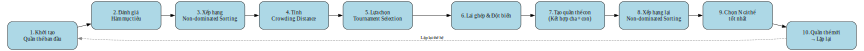

In [11]:
from graphviz import Digraph
from IPython.display import display

dot = Digraph()
dot.attr(rankdir='LR', size='12,6')
dot.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue', fontsize='14', width='2.5', height='1')

# Hàng trên (trái → phải)
dot.node('A', '1. Khởi tạo\nQuần thể ban đầu')
dot.node('B', '2. Đánh giá\nHàm mục tiêu')
dot.node('C', '3. Xếp hạng\nNon-dominated Sorting')
dot.node('D', '4. Tính\nCrowding Distance')
dot.node('E', '5. Lựa chọn\nTournament Selection')
dot.node('F', '6. Lai ghép & Đột biến')

# Hàng dưới (phải → trái)
dot.node('G', '7. Tạo quần thể con\n(Kết hợp cha + con)')
dot.node('H', '8. Xếp hạng lại\nNon-dominated Sorting')
dot.node('I', '9. Chọn N cá thể\ntốt nhất')
dot.node('J', '10. Quần thể mới\n→ Lặp lại')

# Kết nối hàng trên
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')

# Kết nối hàng dưới
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('I', 'J')

# Mũi tên vòng lặp lại đầu
dot.edge('J', 'A', label='Lặp lại thế hệ', style='dashed', color='gray', fontsize='12')

# Hiển thị trong Jupyter Notebook
display(dot)
